# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation.

In [1]:
from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [2]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter)
filterResponseSobelX = signal.convolve2d(image, sobelX)
filterResponseSobelY = signal.convolve2d(image, sobelY)

# Mode = same
filterResponseGauss_S = signal.convolve2d(image, gaussFilter,mode='same')
filterResponseSobelX_S = signal.convolve2d(image, sobelX,mode='same')
filterResponseSobelY_S = signal.convolve2d(image, sobelY,mode='same')

# Mode = valid
filterResponseGauss_M = signal.convolve2d(image, gaussFilter,mode='valid')
filterResponseSobelX_M = signal.convolve2d(image, sobelX,mode='valid')
filterResponseSobelY_M = signal.convolve2d(image, sobelY,mode='valid')

In [3]:
# Show filter responses
import matplotlib.pyplot as plt
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Question 3: What is the size of the different filters?

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?


Answer 1:  Gaussian filter will apply gaussian kernel towards the image.

Answer 2 to 5: It is printed below.

Answer 6: The output consists only of those elements that do not rely on the zero-padding. So, this is why 'valid' convolutions a problem for CNN with many layers. 

In [4]:
# Your code for checking sizes of image and filter responses
print("Size of image {}".format(image.shape))
print("Size of image after gaussian filter {}".format(filterResponseGauss.shape))
print("Size of image after SobelX filter {}".format(filterResponseSobelX.shape))
print("Size of image after SobelX filter {}".format(filterResponseSobelY.shape))

print("Size of image after gaussian filter with mode as same {}".format(filterResponseGauss_S.shape))
print("Size of image after SobelX filter with mode as same{}".format(filterResponseSobelX_S.shape))
print("Size of image after SobelX filter with mode as same{}".format(filterResponseSobelY_S.shape))

print("Size of image after gaussian filter with mode as valid {}".format(filterResponseGauss_M.shape))
print("Size of image after SobelX filter with mode as valid {}".format(filterResponseSobelX_M.shape))
print("Size of image after SobelX filter with mode as valid {}".format(filterResponseSobelY_M.shape))

Size of image (512, 512)
Size of image after gaussian filter (526, 526)
Size of image after SobelX filter (514, 514)
Size of image after SobelX filter (514, 514)
Size of image after gaussian filter with mode as same (512, 512)
Size of image after SobelX filter with mode as same(512, 512)
Size of image after SobelX filter with mode as same(512, 512)
Size of image after gaussian filter with mode as valid (498, 498)
Size of image after SobelX filter with mode as valid (510, 510)
Size of image after SobelX filter with mode as valid (510, 510)


##  Part 3: Get a graphics card

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [5]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 

Using TensorFlow backend.


##  Part 4: How fast is the graphics card?

Lets investigate how much faster a convolution is with the graphics card

Question 7: Why are the filters of size 7 x 7 x 3, and not 7 x 7 ? 

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Question 9: How much faster is the graphics card, compared to the CPU, for convolving a batch of 100 images?

Question 10: How much faster is the graphics card, compared to the CPU, for convolving a batch of 2 images? Explain the difference compared to 100 images.

Answer 7: Filters are used to extract features from images in the process of convolution. This should be of same dimensionality of the input image.

Answer 8: The Conv2D will apply the filter the conventional layer will learning. The layer that is close to the output layer will learn more than the previous layer. signal Conv2d will Compute the gradient of an image by 2D convolution with a complex Scharr operator.  

In [ ]:
# Run this cell to compare processing time of CPU and GPU

import timeit

n_images_in_batch = 100

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

# Perform convolutions using the CPU
def cpu():
  with tf.device('/cpu:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_cpu)

# Perform convolutions using the GPU (graphics card)
def gpu():
  with tf.device('/device:GPU:0'):
    random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the convolution several times and measure the time
print('Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3'
      ' (batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [6]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

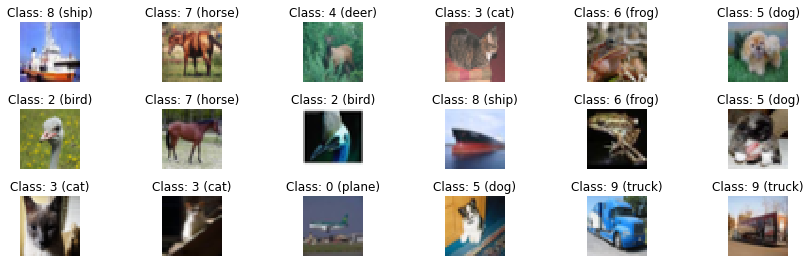

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=0)
# Print the size of training data, validation data and test data
print("The Size of X Training data {}".format(Xtrain.shape))
print("Size of Y Training data {}".format(Ytrain.shape))
print("Size of X Validation data {}".format(Xval.shape))
print("Size of Y Validation data {}".format(Yval.shape))
print("Size of X Test data {}".format(Ytest.shape))
print("Size of Y Test data {}".format(Ytest.shape))



The Size of X Training data (7500, 32, 32, 3)
Size of Y Training data (7500, 1)
Size of X Validation data (2500, 32, 32, 3)
Size of Y Validation data (2500, 1)
Size of X Test data (2000, 1)
Size of Y Test data (2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [9]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/utils/#to_categorical

In [10]:
from keras.utils import to_categorical

# Print shapes before converting the labels
print("The Size of Y training data {}".format(Ytrain.shape))
print("The Size of Y Validation data {}".format(Yval.shape))
print("The Size of Y test data {}".format(Ytest.shape))

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain_categorical = to_categorical(Ytrain,10)
Yval_categorical = to_categorical(Yval,10)
Ytest_categorical = to_categorical(Ytest,10)

# Print shapes after converting the labels
print("Size of Y training data after converting the labels {}".format(Ytrain_categorical.shape))
print("Size of Y validation data after converting the labels {}".format(Yval_categorical.shape))
print("Size of Y testing data after converting the labels {}".format(Ytest_categorical.shape))


The Size of Y training data (7500, 1)
The Size of Y Validation data (2500, 1)
The Size of Y test data (2000, 1)
Size of Y training data after converting the labels (7500, 10)
Size of Y validation data after converting the labels (2500, 10)
Size of Y testing data after converting the labels (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [11]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam,SGD
from keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01,use_batch = True):
    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters = n_filters, kernel_size = (3, 3),activation = 'relu', input_shape = input_shape,padding = "same"))
    if use_batch:
        model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add(Conv2D(filters = 2*n_filters, kernel_size = (3, 3),activation = 'relu',padding = "same"))
        if use_batch:
            model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (2, 2)))
        
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation = 'relu'))
        if use_batch:
            model.add(BatchNormalization())
        if use_dropout == True:
            model.add(Dropout(0.5))
    # Add final dense layer
    model.add(Dense(10, activation = 'softmax'))
   
    # Compile model
    optimizer = Adam(learning_rate = learning_rate)
    model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [12]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

## 2 convolutional layers, no intermediate dense layers

In [13]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]
# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,Ytrain_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xval,Yval_categorical))

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 13s 2ms/step - loss: 2.0060 - accuracy: 0.3472 - val_loss: 2.0459 - val_accuracy: 0.3108
Epoch 2/20
7500/7500 [==============================] - 11s 2ms/step - loss: 1.4611 - accuracy: 0.4931 - val_loss: 1.9362 - val_accuracy: 0.3352
Epoch 3/20
7500/7500 [==============================] - 11s 1ms/step - loss: 1.2676 - accuracy: 0.5595 - val_loss: 1.8295 - val_accuracy: 0.3508
Epoch 4/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.1264 - accuracy: 0.6057 - val_loss: 1.6555 - val_accuracy: 0.4156
Epoch 5/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.0079 - accuracy: 0.6492 - val_loss: 1.5173 - val_accuracy: 0.4688
Epoch 6/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.8969 - accuracy: 0.6839 - val_loss: 1.5317 - val_accuracy: 0.4580
Epoch 7/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.818

In [14]:
# Evaluate the trained model on test set, not used in training or validation
model1.summary()
score = model1.evaluate(Xtest, Ytest_categorical, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

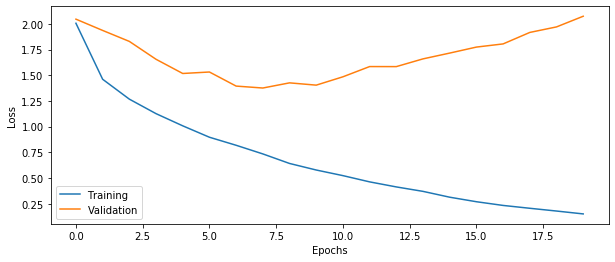

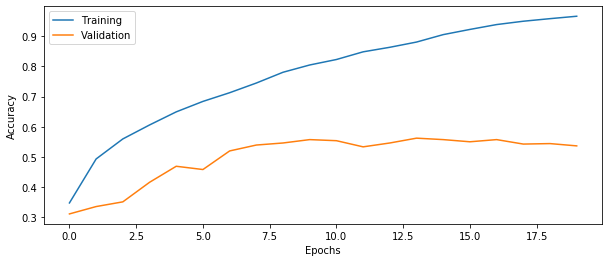

In [15]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance
Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 11: How big is the difference between training and test accuracy?

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'watch nvidia-smi' on the cloud computer during training. 

Question 13: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

Question 11: The difference is around 1 percent. 

Question 13: Here the batch size will arrive at the good solution faster.It has been empirically observed that smaller batch sizes not only has faster training dynamics but also generalization to the test dataset versus larger batch sizes. 

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [16]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,Ytrain_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xval,Yval_categorical))

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 14s 2ms/step - loss: 1.7034 - accuracy: 0.3949 - val_loss: 2.3969 - val_accuracy: 0.1520
Epoch 2/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.2517 - accuracy: 0.5583 - val_loss: 2.8553 - val_accuracy: 0.1800
Epoch 3/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.0410 - accuracy: 0.6396 - val_loss: 2.8472 - val_accuracy: 0.1724
Epoch 4/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.8467 - accuracy: 0.7192 - val_loss: 2.5625 - val_accuracy: 0.2104
Epoch 5/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.6752 - accuracy: 0.7844 - val_loss: 1.9864 - val_accuracy: 0.3436
Epoch 6/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.5250 - accuracy: 0.8489 - val_loss: 1.5975 - val_accuracy: 0.4564
Epoch 7/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.395

In [17]:
# Evaluate the trained model on test set, not used in training or validation
model2.summary()
score = model2.evaluate(Xtest, Ytest_categorical, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

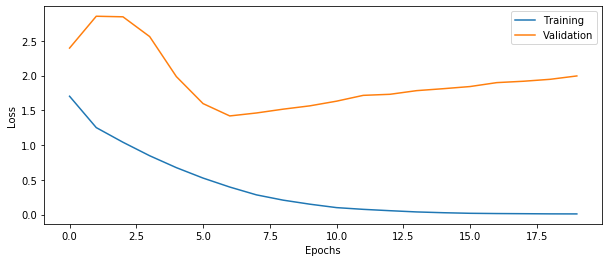

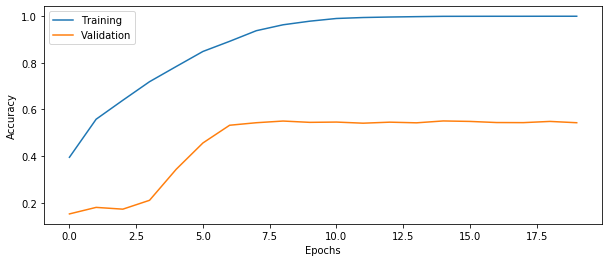

In [18]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [19]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain,Ytrain_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xval,Yval_categorical))

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 16s 2ms/step - loss: 2.0760 - accuracy: 0.2845 - val_loss: 2.3918 - val_accuracy: 0.1208
Epoch 2/20
7500/7500 [==============================] - 14s 2ms/step - loss: 1.5287 - accuracy: 0.4507 - val_loss: 2.4684 - val_accuracy: 0.1508
Epoch 3/20
7500/7500 [==============================] - 13s 2ms/step - loss: 1.3571 - accuracy: 0.5099 - val_loss: 2.3426 - val_accuracy: 0.2040
Epoch 4/20
7500/7500 [==============================] - 13s 2ms/step - loss: 1.2182 - accuracy: 0.5677 - val_loss: 1.9941 - val_accuracy: 0.2876
Epoch 5/20
7500/7500 [==============================] - 13s 2ms/step - loss: 1.1100 - accuracy: 0.6116 - val_loss: 1.7852 - val_accuracy: 0.3656
Epoch 6/20
7500/7500 [==============================] - 14s 2ms/step - loss: 0.9989 - accuracy: 0.6481 - val_loss: 1.5743 - val_accuracy: 0.4428
Epoch 7/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.908

In [20]:
# Evaluate the trained model on test set, not used in training or validation
model3.summary()
score = model3.evaluate(Xtest, Ytest_categorical, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)         

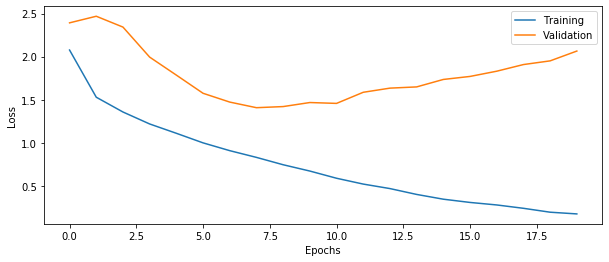

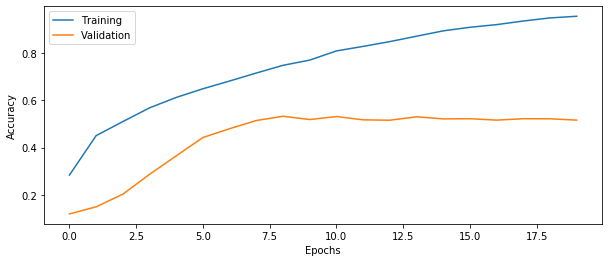

In [21]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 14: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Question 15: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Question 16: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Question 17: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Question 18: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 19: How does MaxPooling help in reducing the number of parameters to train?

Question 14: The no of trainable parameters are 27544. The dense_42 has the most no of trainable parameters.

Question 15: The input shape is (32,32,3) and the output shape is (24,24,18).

Question 16: No, The batch size need be the first dimension of each 4D tensor.

Question 17: 

Question 18: The number of parameters will be equal to out_channels * (in_channels * kernel_h * kernel_w + 1).

Question 19:Max pooling is a sample-based discretization process. It reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.

In [22]:
# Print network architecture
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 20: How much did the test accuracy improve with dropout, compared to without dropout?

Question 21: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


Answer 20: The accuracy has increased by 1% after applying dropout.

Answer 21: The regularization can be added in layer by adding argument tf.kernas.regularizers.l2(0.01).

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [23]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,Ytrain_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xval,Yval_categorical))

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 16s 2ms/step - loss: 2.5606 - accuracy: 0.2104 - val_loss: 2.3809 - val_accuracy: 0.1044
Epoch 2/20
7500/7500 [==============================] - 14s 2ms/step - loss: 1.9862 - accuracy: 0.3068 - val_loss: 2.3786 - val_accuracy: 0.1476
Epoch 3/20
7500/7500 [==============================] - 14s 2ms/step - loss: 1.7670 - accuracy: 0.3665 - val_loss: 2.3142 - val_accuracy: 0.1696
Epoch 4/20
7500/7500 [==============================] - 14s 2ms/step - loss: 1.6373 - accuracy: 0.4071 - val_loss: 2.0838 - val_accuracy: 0.2676
Epoch 5/20
7500/7500 [==============================] - 13s 2ms/step - loss: 1.5281 - accuracy: 0.4392 - val_loss: 1.8731 - val_accuracy: 0.3148
Epoch 6/20
7500/7500 [==============================] - 14s 2ms/step - loss: 1.4350 - accuracy: 0.4727 - val_loss: 1.5491 - val_accuracy: 0.4480
Epoch 7/20
7500/7500 [==============================] - 14s 2ms/step - loss: 1.364

In [24]:
# Evaluate the trained model on test set, not used in training or validation
model4.summary()
score = model4.evaluate(Xtest, Ytest_categorical, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)         

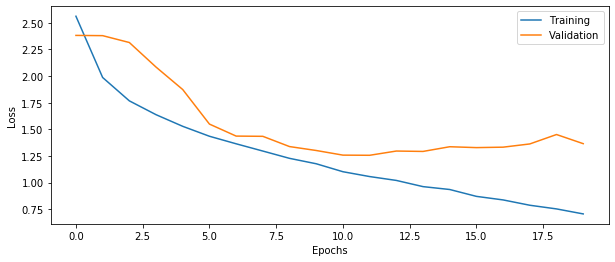

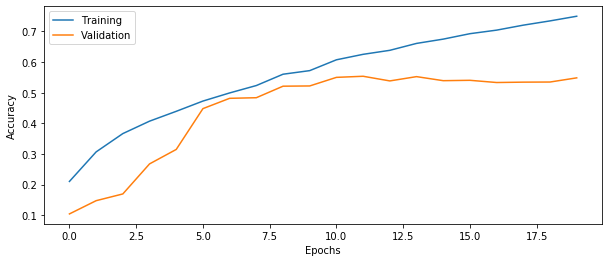

In [25]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 22: How high test accuracy can you obtain? What is your best configuration?

## Your best config

In [26]:
from sklearn.utils import class_weight
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = (32,32,3)
class_weight = class_weight.compute_class_weight("balanced", np.unique(Ytrain), Ytrain[:,0])
# Build model
model5 =  build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,Ytrain_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(Xval,Yval_categorical),class_weight=class_weight)

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 14s 2ms/step - loss: 1.7952 - accuracy: 0.3804 - val_loss: 2.2335 - val_accuracy: 0.2044
Epoch 2/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.2934 - accuracy: 0.5473 - val_loss: 2.4167 - val_accuracy: 0.2152
Epoch 3/20
7500/7500 [==============================] - 12s 2ms/step - loss: 1.0687 - accuracy: 0.6263 - val_loss: 2.4551 - val_accuracy: 0.2192
Epoch 4/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.8915 - accuracy: 0.6933 - val_loss: 2.1429 - val_accuracy: 0.2912
Epoch 5/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.7166 - accuracy: 0.7697 - val_loss: 1.8961 - val_accuracy: 0.3724
Epoch 6/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.5789 - accuracy: 0.8228 - val_loss: 1.5144 - val_accuracy: 0.4708
Epoch 7/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.440

In [27]:
# Evaluate the trained model on test set, not used in training or validation
model5.summary()
score = model5.evaluate(Xtest, Ytest_categorical, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_17 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

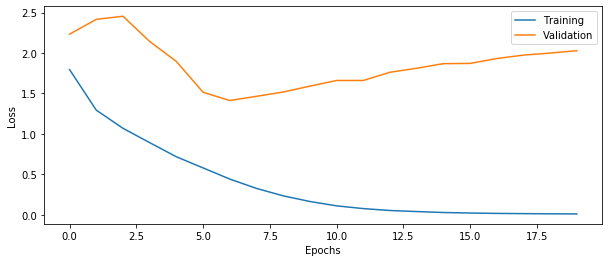

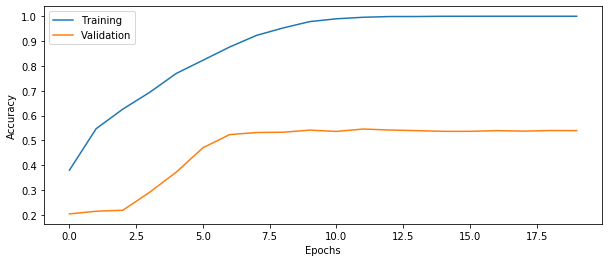

In [28]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 23: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

In [29]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

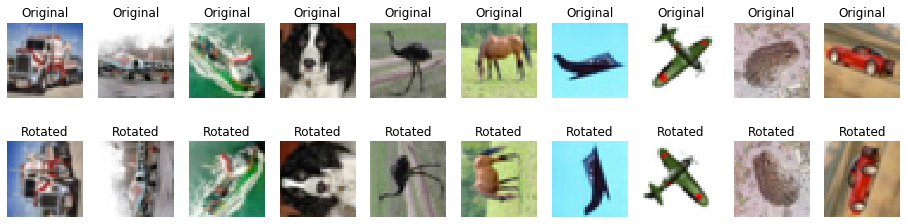

In [30]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [31]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated, Ytest_categorical, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

2000/2000 [==============================] - 1s 567us/step
Test loss: 4.5902
Test accuracy: 0.2220


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://keras.io/preprocessing/image/

In [32]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [33]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=1,shuffle = True)
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True, vertical_flip=True, validation_split=0.2)
batch_size = 100
# Setup a flow for training data, assume that we can fit all images into CPU memory
training_data = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)
# Setup a flow for validation data, assume that we can fit all images into CPU memory
validation_data = datagen.flow(Xvalidation, Yvalidation, batch_size=batch_size)

## Part 18: What about big data?

Question 24: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

Answer 24: A custom generator should be created that will load the dataset as batches from the harddisk. 

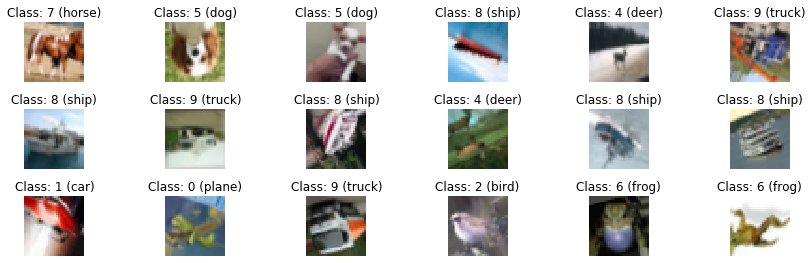

In [34]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/models/model/ for how to use model.fit_generator instead of model.fit for training

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 25: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Question 26: What other types of image augmentation can be applied, compared to what we use here?

Answer 25: 

Answer 26: The accuracy will be decreased due to rotation, flipping. 

In [35]:
# Setup some training parameters
batch_size = 100
epochs = 70
input_shape = (32,32,3)

# Build model (your best config)
model6 = build_CNN(input_shape, n_conv_layers=4, n_filters=32, n_dense_layers=2, n_nodes=256,learning_rate=0.01)

# Setup a flow for training data, assume that we can fit all images into CPU memory
train_datagen = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)

# Setup a flow for validation data, assume that we can fit all images into CPU memory
val_datagen = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = model6.fit_generator(train_datagen,validation_data = val_datagen, steps_per_epoch = len(Xtrain)*(1 - validation_split)/batch_size,epochs = epochs ,validation_steps = len(Xtrain)*validation_split/batch_size)

Epoch 1/70
60/60 [==============================] - 24s 402ms/step - loss: 2.0866 - accuracy: 0.2808 - val_loss: 2.3461 - val_accuracy: 0.1913
Epoch 2/70
60/60 [==============================] - 22s 361ms/step - loss: 1.7207 - accuracy: 0.3832 - val_loss: 3.0217 - val_accuracy: 0.1153
Epoch 3/70
60/60 [==============================] - 20s 337ms/step - loss: 1.5774 - accuracy: 0.4243 - val_loss: 3.1099 - val_accuracy: 0.1053
Epoch 4/70
60/60 [==============================] - 20s 330ms/step - loss: 1.5101 - accuracy: 0.4580 - val_loss: 2.6440 - val_accuracy: 0.1933
Epoch 5/70
60/60 [==============================] - 20s 333ms/step - loss: 1.4549 - accuracy: 0.4687 - val_loss: 3.4320 - val_accuracy: 0.1353
Epoch 6/70
60/60 [==============================] - 20s 333ms/step - loss: 1.4085 - accuracy: 0.4912 - val_loss: 2.7049 - val_accuracy: 0.1833
Epoch 7/70
60/60 [==============================] - 20s 331ms/step - loss: 1.3589 - accuracy: 0.5043 - val_loss: 1.9243 - val_accuracy: 0.3040

Epoch 58/70
60/60 [==============================] - 21s 351ms/step - loss: 0.6169 - accuracy: 0.7783 - val_loss: 0.4500 - val_accuracy: 0.7873
Epoch 59/70
60/60 [==============================] - 21s 347ms/step - loss: 0.6124 - accuracy: 0.7827 - val_loss: 0.6303 - val_accuracy: 0.7847
Epoch 60/70
60/60 [==============================] - 19s 320ms/step - loss: 0.6271 - accuracy: 0.7735 - val_loss: 0.6039 - val_accuracy: 0.7900
Epoch 61/70
60/60 [==============================] - 20s 333ms/step - loss: 0.5974 - accuracy: 0.7883 - val_loss: 0.4247 - val_accuracy: 0.7940
Epoch 62/70
60/60 [==============================] - 21s 345ms/step - loss: 0.5668 - accuracy: 0.7953 - val_loss: 0.6282 - val_accuracy: 0.7907
Epoch 63/70
60/60 [==============================] - 22s 359ms/step - loss: 0.5732 - accuracy: 0.7953 - val_loss: 0.5035 - val_accuracy: 0.8053
Epoch 64/70
60/60 [==============================] - 20s 332ms/step - loss: 0.5932 - accuracy: 0.7917 - val_loss: 0.5506 - val_accuracy:

In [36]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest_categorical, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest_categorical, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.4235
Test accuracy: 0.5930
Test loss: 2.8926
Test accuracy: 0.3100


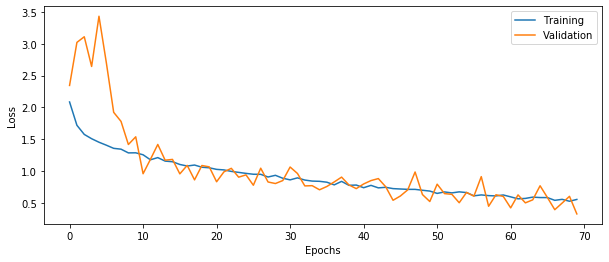

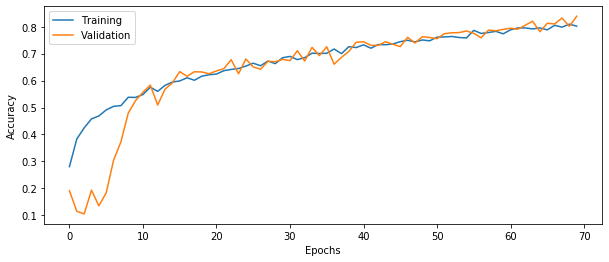

In [37]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly

In [38]:
# Find misclassified images
y_pred = model6.predict_classes(Xtest)
y_correct = np.argmax(Ytest_categorical,axis=1)

miss = np.flatnonzero(y_correct != y_pred)

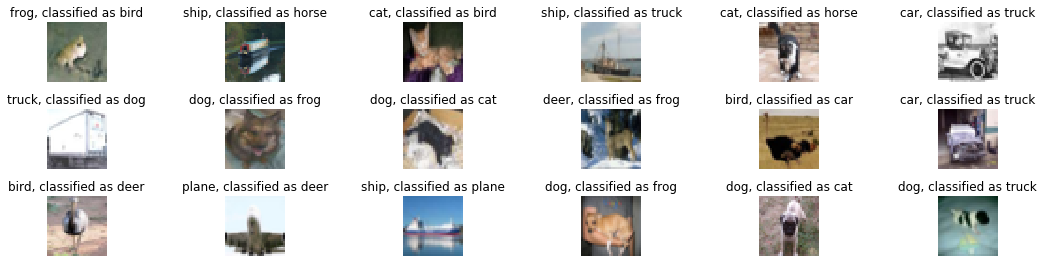

In [39]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 27: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Answer 27: No, it can be done only for 32 X 32. 

Question 28: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

Answer 28: No, It is a general statement related to the answer 27.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database. Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 29: How many convolutional layers does ResNet50 have?  

Answer 29: 50 conventional layers

Question 30: How many trainable parameters does the ResNet50 network have? 

Answer 30: 25 million trainable parameters

Question 31: What is the size of the images that ResNet50 expects as input?

Answer 31: (224,224,3)

Question 32: Using the answer to question 30, explain why the second derivative is seldom used when training deep networks. 

Answer 32: The second derivative is the covariance matrix.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/applications/#resnet

Useful functions

`image.load_img` in keras.preprocessing

`image.img_to_array` in keras.preprocessing

`ResNet50` in keras.applications.resnet50

`preprocess_input` in keras.applications.resnet50

`decode_predictions` in keras.applications.resnet50

`expand_dims` in numpy


In [57]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

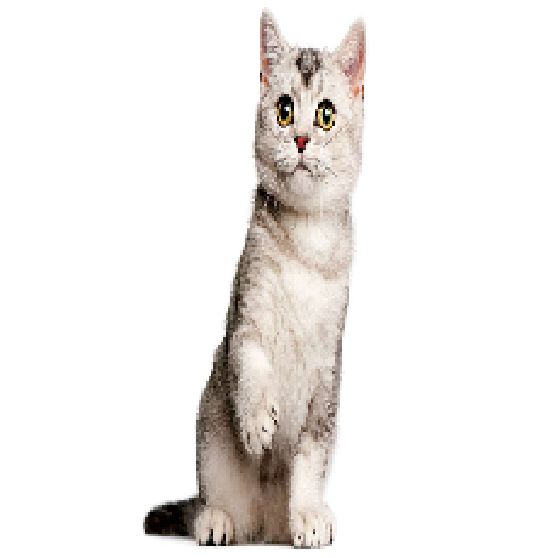

40960/35363 [==================================] - 0s 4us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.5104031), ('n02109961', 'Eskimo_dog', 0.14020634), ('n02110185', 'Siberian_husky', 0.11934888)]


In [59]:
model = ResNet50(weights='imagenet')

img = image.load_img('Cat.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img)
ax.imshow(img_array / 255.) 
ax.axis('off')
plt.show()

print('Predicted:', decode_predictions(preds, top=3)[0])

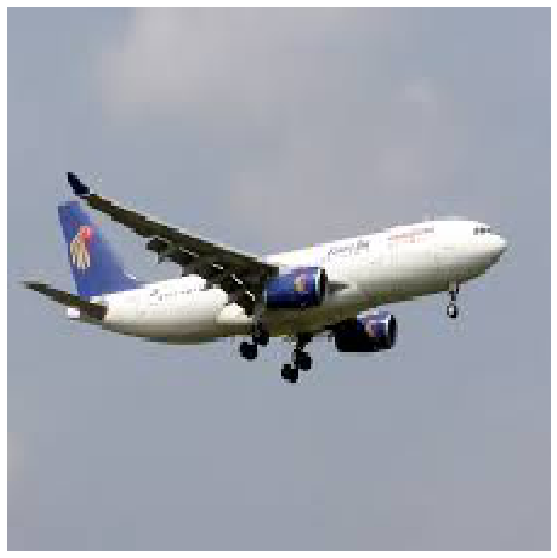

Predicted: [('n02690373', 'airliner', 0.9822166), ('n04592741', 'wing', 0.010745389), ('n04552348', 'warplane', 0.0066661634)]


In [60]:
img_path = 'Aeroplane.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img)
ax.imshow(img_array / 255.) 
ax.axis('off')
plt.show()

print('Predicted:', decode_predictions(preds, top=3)[0])

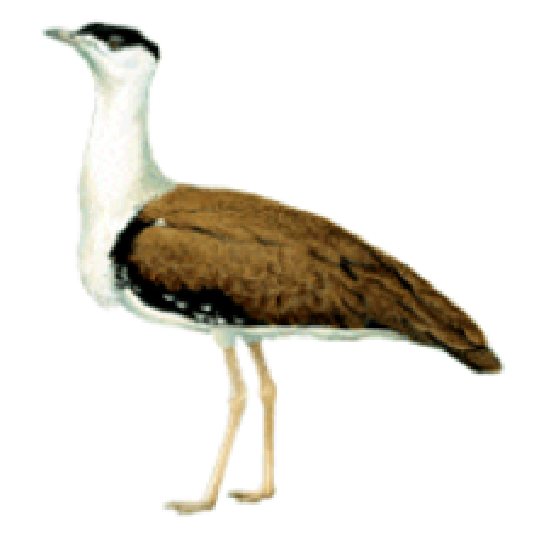

Predicted: [('n02018795', 'bustard', 0.99986506), ('n02002724', 'black_stork', 7.0175935e-05), ('n02011460', 'bittern', 2.2034254e-05)]


In [61]:
img_path = 'Bird.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img)
ax.imshow(img_array / 255.) 
ax.axis('off')
plt.show()

print('Predicted:', decode_predictions(preds, top=3)[0])

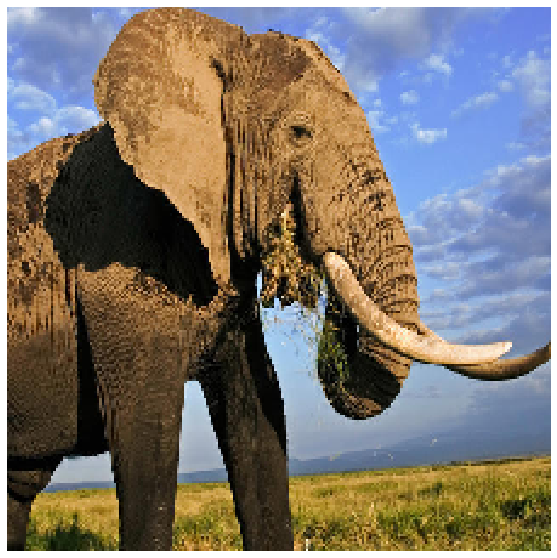

Predicted: [('n02504458', 'African_elephant', 0.778717), ('n01871265', 'tusker', 0.12713975), ('n02504013', 'Indian_elephant', 0.09208994)]


In [62]:
img_path = 'Elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img)
ax.imshow(img_array / 255.) 
ax.axis('off')
plt.show()

print('Predicted:', decode_predictions(preds, top=3)[0])

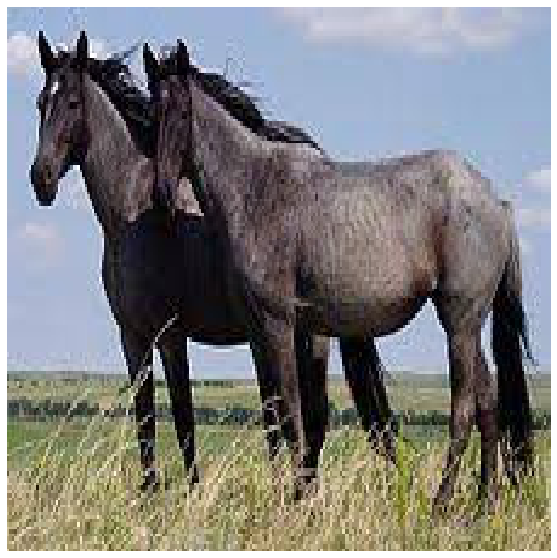

Predicted: [('n02422106', 'hartebeest', 0.26864687), ('n02389026', 'sorrel', 0.25673044), ('n02437312', 'Arabian_camel', 0.19437817)]


In [63]:
img_path = 'Horse.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img)
ax.imshow(img_array / 255.) 
ax.axis('off')
plt.show()

print('Predicted:', decode_predictions(preds, top=3)[0])